# <center> Neural Networks

## Insert here your data for testing (CSV format, should be in the same folder of the Notebook):

In [ ]:
test = #'filename.csv'

## Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from livelossplot.keras import PlotLossesCallback
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import History
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import warnings
warnings.filterwarnings("ignore")
data= pd.read_csv("creditcard_train.csv")
X = data.drop(['Class'], axis = 1)
y = data.Class
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
X_train['normalizedAmount'] = StandardScaler().fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train = X_train.drop(['Amount'],axis=1)
X_train = X_train.drop(['Time'],axis=1)
X_test['normalizedAmount'] = StandardScaler().fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test = X_test.drop(['Amount'],axis=1)
X_test = X_test.drop(['Time'],axis=1)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train)

Using TensorFlow backend.


## Part 1: all the dataset

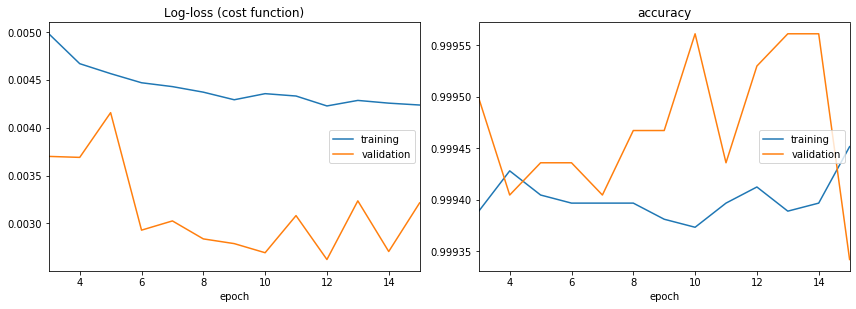

Log-loss (cost function):
training   (min:    0.004, max:    0.033, cur:    0.004)
validation (min:    0.003, max:    0.006, cur:    0.003)

accuracy:
training   (min:    0.998, max:    0.999, cur:    0.999)
validation (min:    0.998, max:    1.000, cur:    0.999)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39805
           1       0.79      0.82      0.81        68

    accuracy                           1.00     39873
   macro avg       0.89      0.91      0.90     39873
weighted avg       1.00      1.00      1.00     39873

Test Data Accuracy: 0.9993


<Figure size 432x288 with 0 Axes>

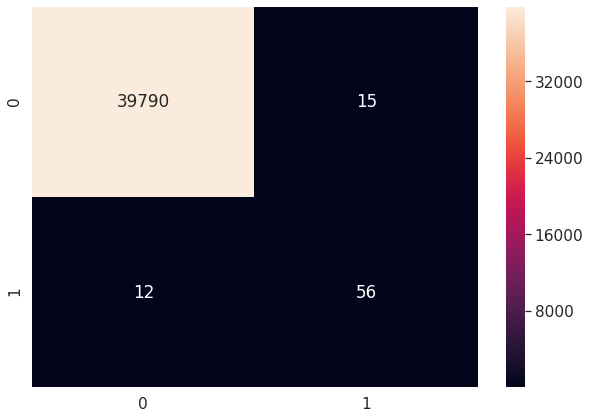

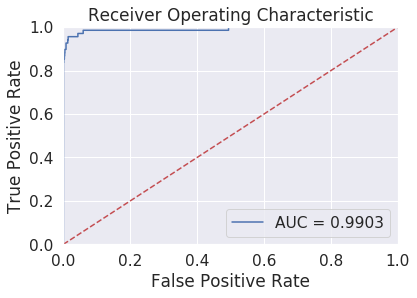

In [3]:
#Create model

from keras import regularizers

model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'uniform',kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_dim = 29))
model.add(Dense(units = 15, kernel_initializer = 'uniform',kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 15,verbose = 0,validation_data = (X_validate, y_validate), callbacks=[PlotLossesCallback()])
#CHANGE VALIDATION
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))
plt.figure()
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Part 2: undersample the dataset

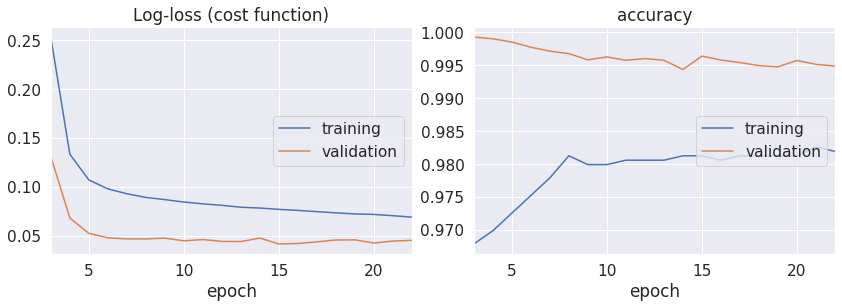

Log-loss (cost function):
training   (min:    0.069, max:    0.672, cur:    0.069)
validation (min:    0.042, max:    0.622, cur:    0.045)

accuracy:
training   (min:    0.888, max:    0.983, cur:    0.982)
validation (min:    0.994, max:    0.999, cur:    0.995)
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     39805
           1       0.22      0.93      0.36        68

    accuracy                           0.99     39873
   macro avg       0.61      0.96      0.68     39873
weighted avg       1.00      0.99      1.00     39873

Test Data Accuracy: 0.9943


<Figure size 432x288 with 0 Axes>

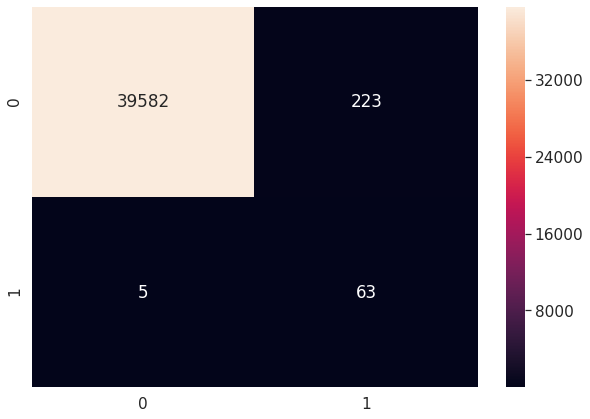

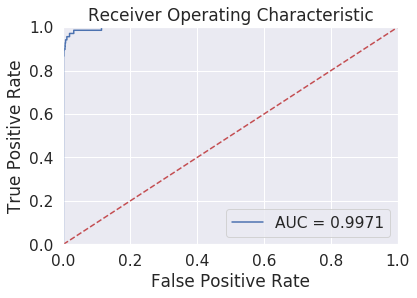

In [4]:
#Undersampling
from sklearn.utils.class_weight import compute_sample_weight
class_wt = compute_sample_weight(class_weight = 'balanced', y = y_train)

train = pd.concat([X_train,y_train], axis = 1).sample(frac=1)
nofraud_under = train.loc[train.Class == 0][:int(np.round((len(train))*0.01))]
fraud= train.loc[train.Class == 1]
train = pd.concat([fraud, nofraud_under]).sample(frac=1)
X_train = train.drop(['Class'], axis = 1)
y_train = train.Class

#Create model

model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'uniform',kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_dim = 29))
model.add(Dense(units = 15, kernel_initializer = 'uniform',kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 22,verbose = 0,class_weight = class_wt, validation_data = (X_validate, y_validate), callbacks=[PlotLossesCallback()])
#CHANGE VALIDATION,
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))
plt.figure()
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Part 3: drop irrelevant features

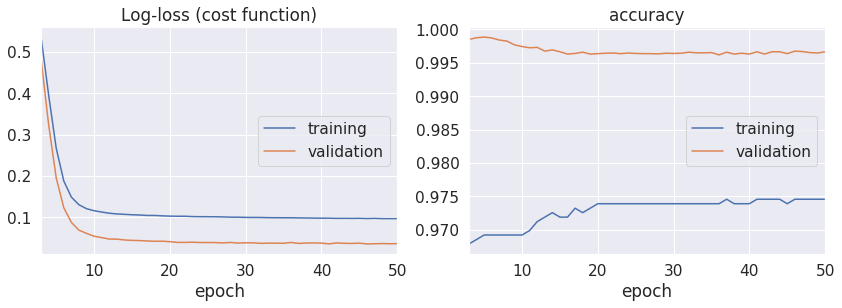

Log-loss (cost function):
training   (min:    0.097, max:    0.683, cur:    0.097)
validation (min:    0.036, max:    0.664, cur:    0.037)

accuracy:
training   (min:    0.857, max:    0.975, cur:    0.975)
validation (min:    0.996, max:    0.999, cur:    0.997)
0.48872894
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39805
           1       0.34      0.93      0.49        68

    accuracy                           1.00     39873
   macro avg       0.67      0.96      0.75     39873
weighted avg       1.00      1.00      1.00     39873

Test Data Accuracy: 0.9968


<Figure size 432x288 with 0 Axes>

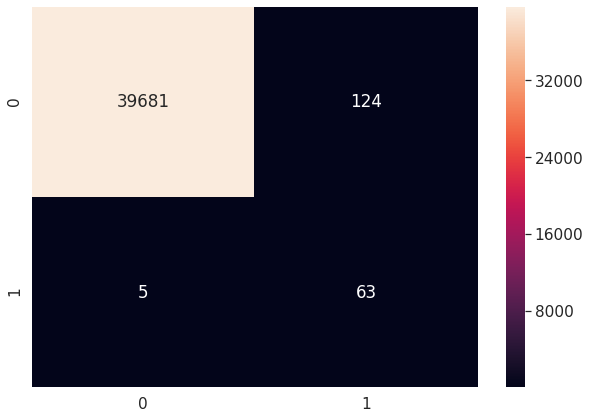

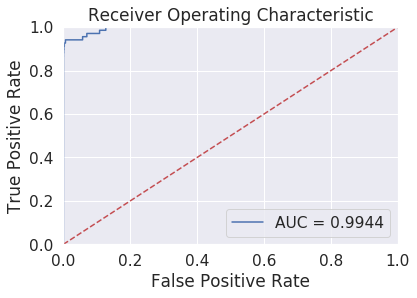

In [5]:
#Drop features

X_train = X_train.drop(['V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normalizedAmount'],axis=1)
X_test = X_test.drop(['V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normalizedAmount'],axis=1)
X_validate = X_validate.drop(['V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normalizedAmount'],axis=1)

#Create model

model = Sequential()
model.add(Dense(units = 7, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001),activation = 'relu', input_dim = 8))
model.add(Dense(units = 7, kernel_initializer = 'uniform',kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 50,verbose = 0,class_weight = class_wt,validation_data = (X_validate, y_validate),callbacks=[PlotLossesCallback()])
#XHANGE VALIDATION
fpr, tpr, thresholds = roc_curve(y_validate, model.predict(X_validate))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)
y_pred = model.predict(X_test)
y_pred = (y_pred > optimal_threshold)
print(classification_report(y_test, y_pred))
plt.figure()
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Final results

In [ ]:
#Use entire dataset for training
train = data.sample(frac=1)
nofraud_under = train.loc[train.Class == 0][:int(np.round((len(train))*0.005))]
fraud= train.loc[train.Class == 1]
train = pd.concat([fraud, nofraud_under]).sample(frac=1)
X_train = train.drop(['Class','V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Time'], axis = 1)
y_train = train.Class

#Elaborate test data

data_final = pd.read_csv(test)
X_final = data_final.drop(['Class','V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Time'], axis = 1)
y_final = data_final.Class

#Make prediction
model = Sequential()
model.add(Dense(units = 7, kernel_initializer = 'uniform',kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_dim = 8))
model.add(Dense(units = 7, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001),activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 30,class_weight = class_wt,verbose = 0,callbacks=[PlotLossesCallback()])

In [ ]:
y_pred = model.predict(X_final)
y_pred = (y_pred > 0.07)
print(classification_report(y_final, y_pred))
plt.figure()
cm = confusion_matrix(y_final, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_final, y_pred))
plt.figure()

fpr, tpr, thresholds = roc_curve(y_final, model.predict(X_final))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

#Print predictions

np.savetxt('NN_predictions.txt',y_pred, fmt = '%i', newline = '\n')